In [9]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['#97C1A9','#FFFFFF']

warnings.filterwarnings('ignore')

<h1>DATA INFO</h1>

In [3]:
baseIndicadores = pd.read_csv('../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
#data/diabetes_012_health_indicators_BRFSS2015.csv
#data/diabetes_binary_health_indicators_BRFSS2015.csv
baseIndicadores
#for i in range(20):
#    print(i)
#    print(baseIndicadores.loc[[i]])

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
baseIndicadores.info()
print('Dimensiones del archivo')
print(baseIndicadores.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
baseIndicadores.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [7]:
baseIndicadores.isnull().mean()

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

<h1>EDA</h1>

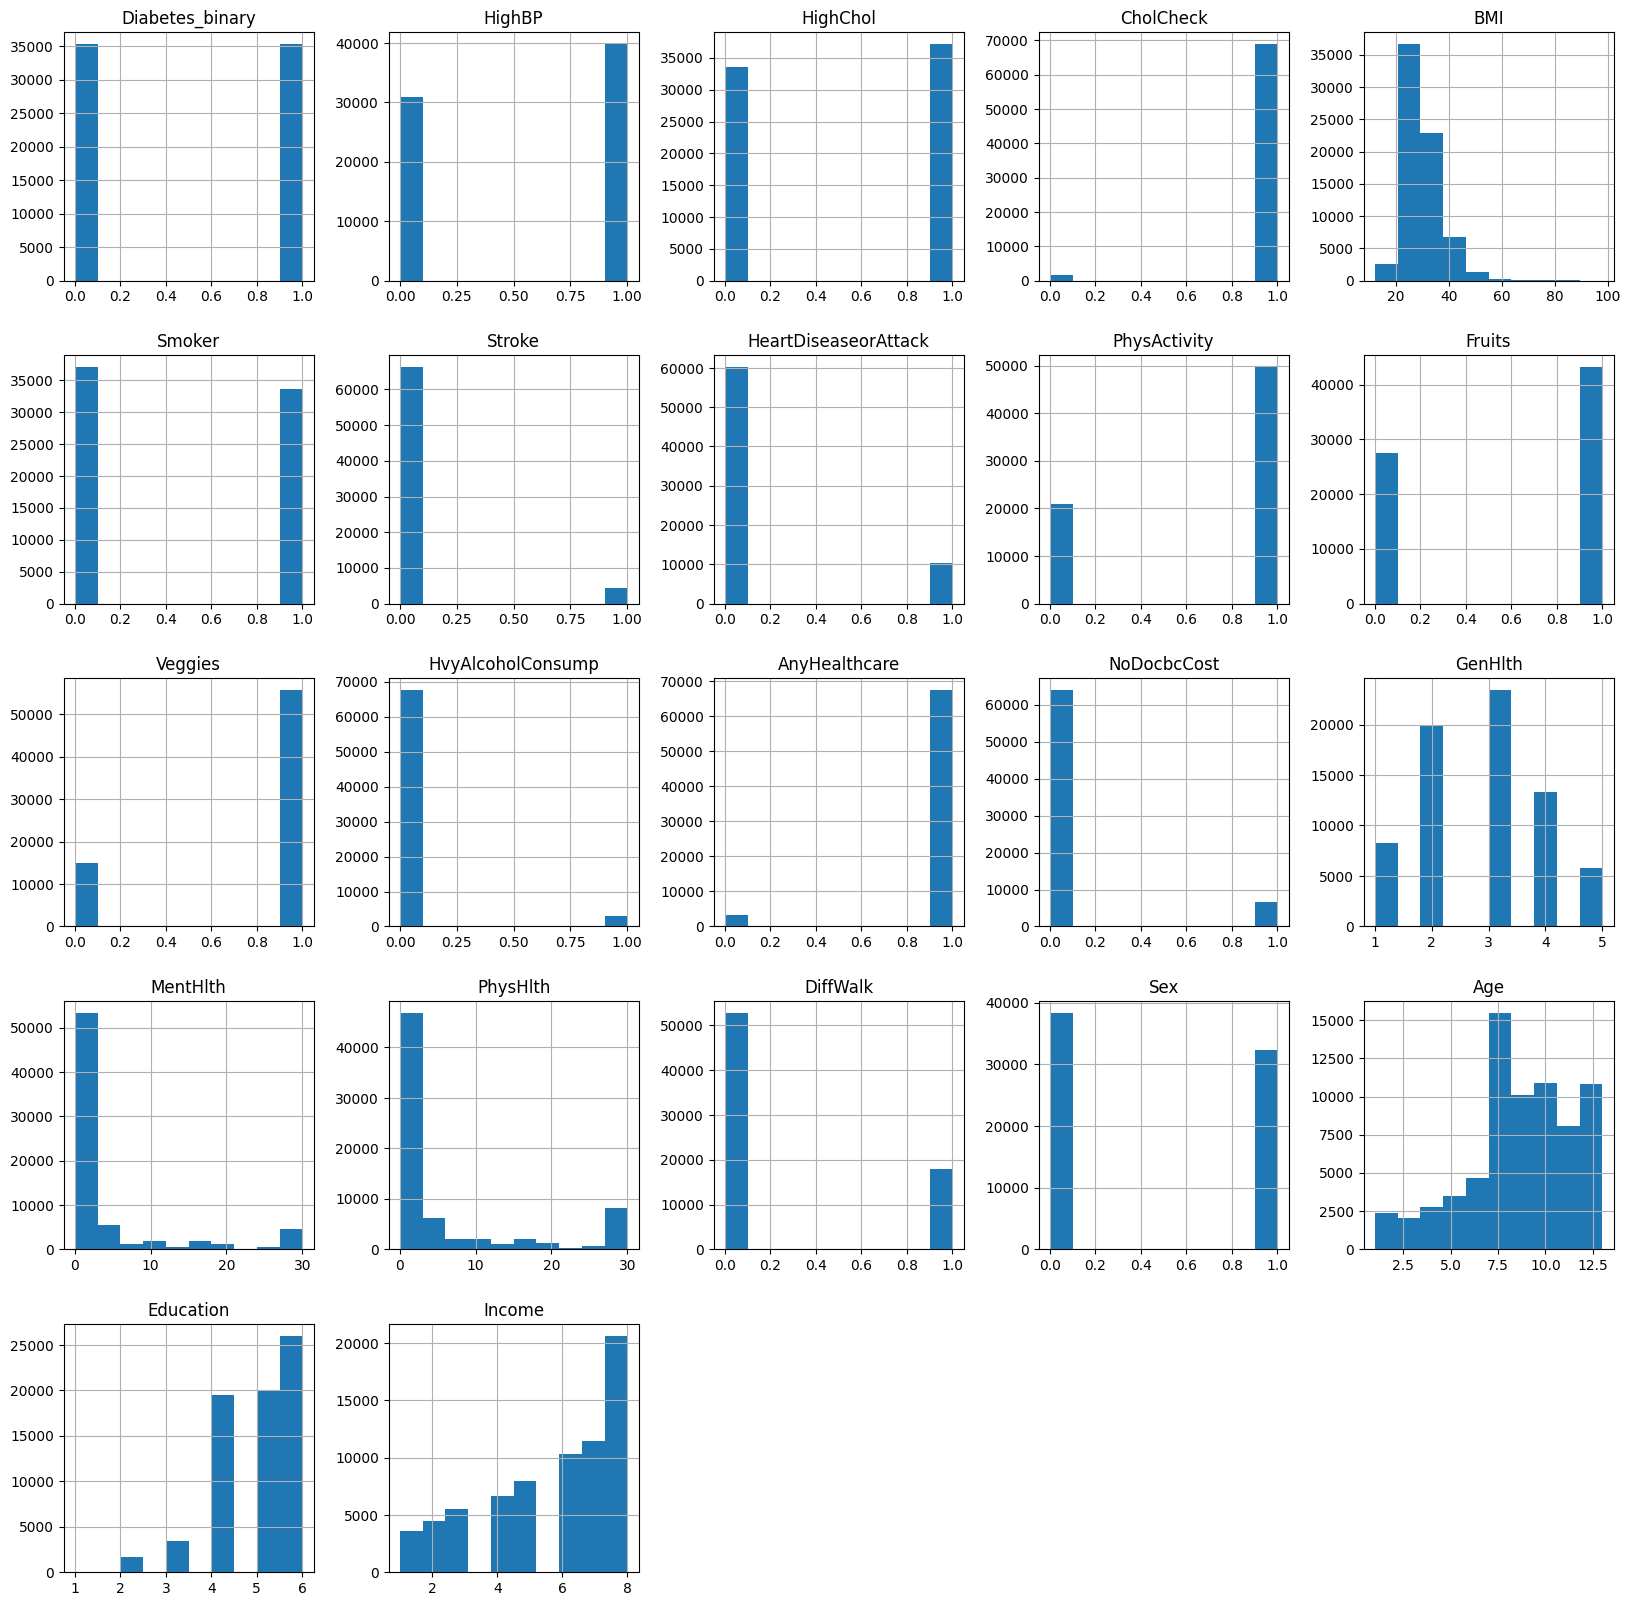

In [8]:
baseIndicadores.hist(figsize=(20,20));

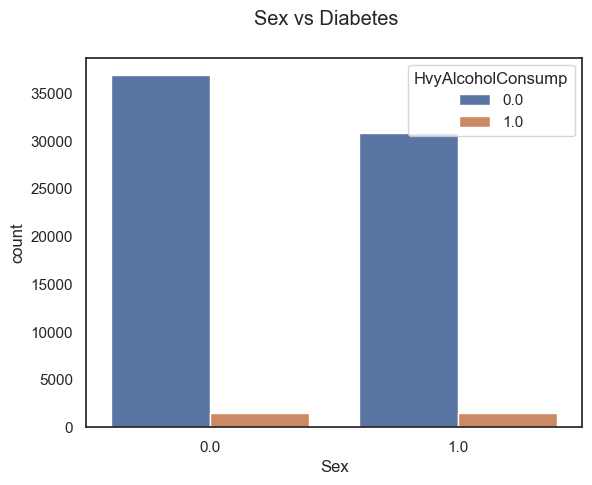

In [5]:
sns.set(style='white')
#plt.subplot(1,3,3)
ax = sns.countplot(data=baseIndicadores, x="Sex", hue="HvyAlcoholConsump")
tit = 'Sex vs HvyAlcoholConsump'
plt.suptitle(tit)
plt.show()

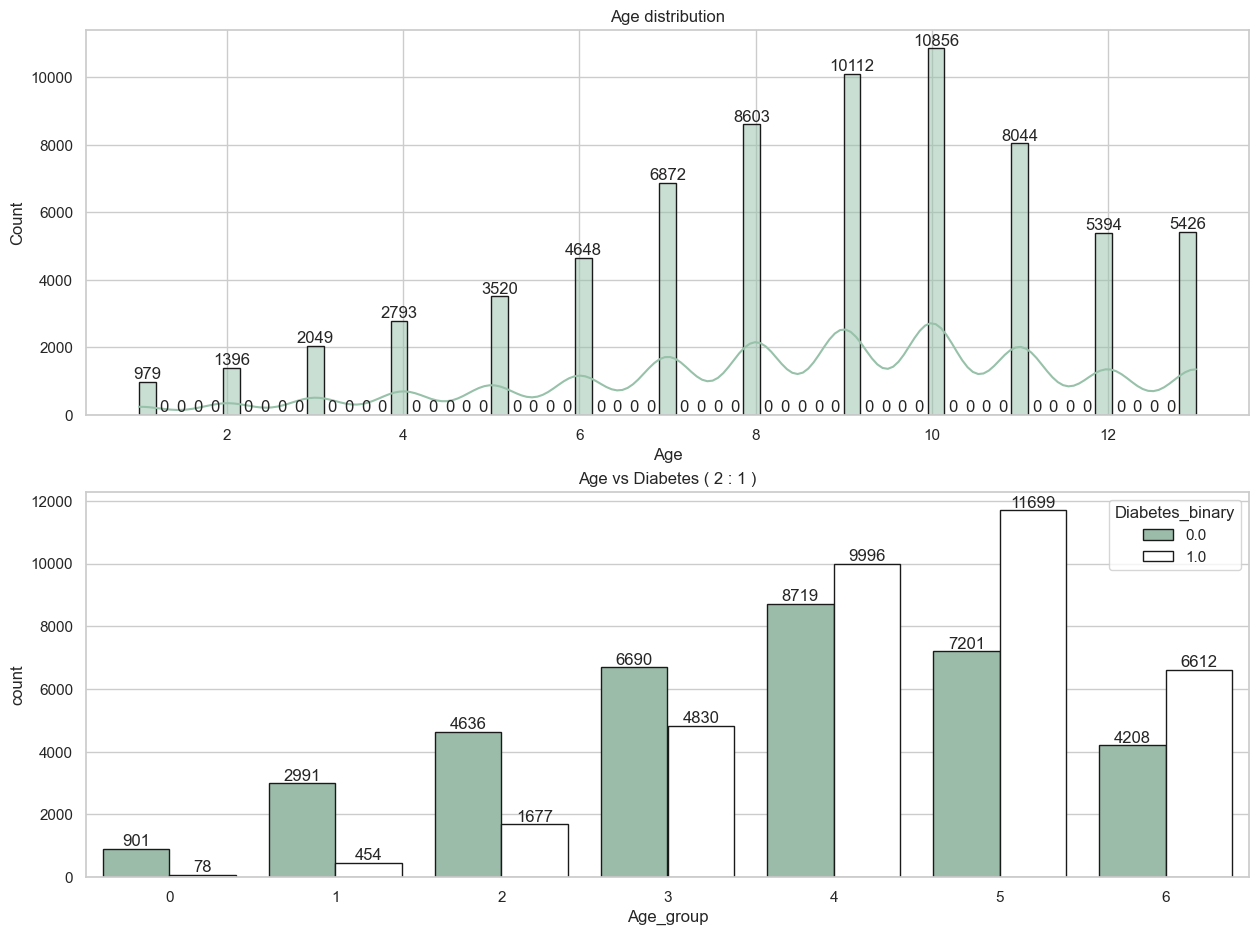

In [14]:
#Numerical Plot
def numplot(df,x,scale): 
   sns.set(style='whitegrid')
   fig = plt.subplots(2,1,figsize = (15,11))
   plt.subplot(2,1,1)
   ax = sns.histplot(data=df, x=x, kde=True,color=colors[0],edgecolor = 'k')
   ax.bar_label(ax.containers[0])
   tit=x + ' distribution'
   plt.title(tit)
   plt.subplot(2,1,2)
   tar=x + '_group'
   Tstr= str(scale)
   tit2=x + ' vs Diabetes ( ' + Tstr + ' : 1 )'
   df[tar] = [ int(i / scale) for i in df[x]]
   ax=sns.countplot(data=df, x=tar, hue='Diabetes_binary',palette = colors,edgecolor = 'k')
   for container in ax.containers:
     ax.bar_label(container)
   plt.title(tit2)

numplot(baseIndicadores,'Age',2)

<h1>Features Engineering</h1>

Duplicate rows :  23899


<Axes: >

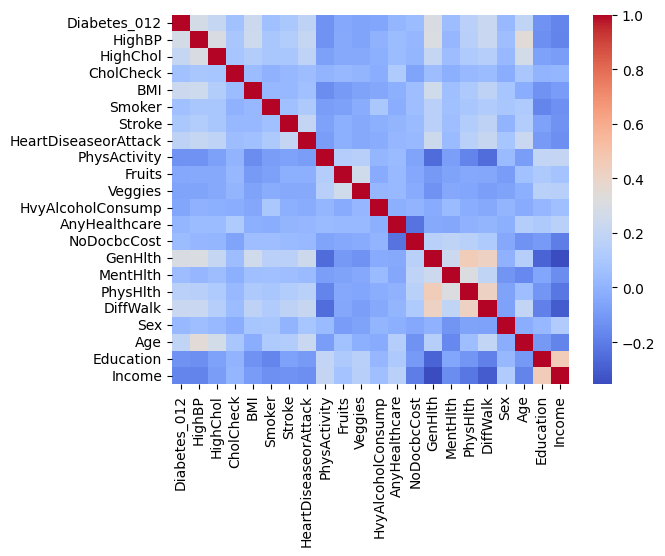

In [8]:
duplicate = baseIndicadores[baseIndicadores.duplicated()]
print("Duplicate rows : ",len(duplicate))

porrep_corr = baseIndicadores.corr(method='spearman', numeric_only=True)
sns.heatmap(porrep_corr, xticklabels=porrep_corr.columns,yticklabels=porrep_corr.columns,cmap='coolwarm')
#baseIndicadores.corr()

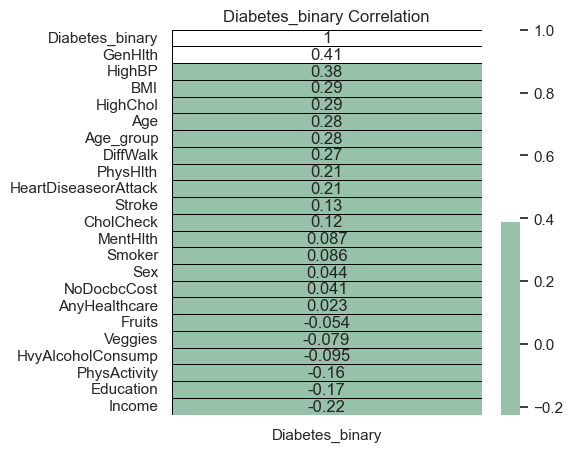

In [15]:
corr = baseIndicadores.corrwith(baseIndicadores['Diabetes_binary']).sort_values(ascending = False).to_frame()
corr.columns = ['Diabetes_binary']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Diabetes_binary Correlation');

Todas las variables no se aprecian correlacionadas con Diabetes salvo HenHlth.

<h1>Modelo Predictivo</h1>